# Credit card transaction 
### by Federico Lancini

L'obiettivo di questo progetto è quello di analizzare il dataset "credit card fraud detection" disponibile su Kaggle per creare
un modello predittivo per l'identificazione di transazioni fraudolente.

Dopo un EDA, il progetto mira all'utilizzo di diversi tipi di algoritmi di classificazione, nel nostro caso i seguenti:
regressione logistica, random forest e Nearest Neighbour



#### dataset sbilanciato

Il dataset è fortemente sbilanciato, quindi bisogna utilizzare delle tecniche per migliorare le performance degli algoritmi.
Sempre per la questione di sbilanciamento del dataset non tutti gli indici di "bontà" degli algoritmi sono utilizzabili.
Quelli più adatti a questo scopo sono: precisione, recall, indice f1 e indice AUC.

In [2]:
# importo i pacchetti necessari
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import seaborn as sns
from scipy import stats

# random forest
from sklearn.ensemble import RandomForestClassifier

# logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, recall_score, roc_auc_score

# k-NN
from sklearn import neighbors
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

apriamo il dataset, reperibile al seguente link:    
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [3]:
dataset = pd.read_csv("C:\\Users\\user\\Desktop\\progetto coding\\archive\\creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


La variabile target è "Class", che vale 0 se la transazione è onesta, 1 se è fraudolenta

In [4]:
dataset = dataset.astype({'Class':int})

Iniziamo con un EDA

In [5]:
dataset.info()
dataset.describe()
dataset.dtypes
dataset.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Controlliamo la presenza di missing value nel dataset

In [6]:
dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Come si può vedere non c'è nessun missing value per nessun attiributo

Controlliamo se il dataset è bilanciato o meno

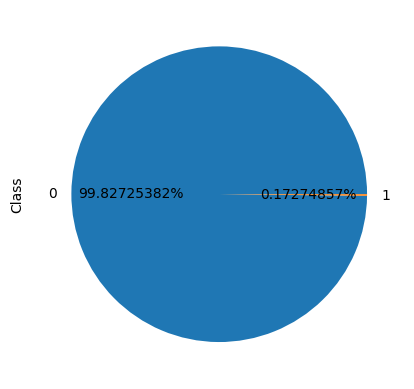

In [7]:

dataset['Class'].value_counts().plot.pie(autopct='%1.8f%%');

Chiaramente il dataset è sbilanciato in quanto la classe delle transazioni fraudolente è meno dello 0.2%

A questo punto potremmo procedere normalizzando i dati per poter confrontare tra loro dati numerici di diversa natura
sappiamo che tutti gli attributi provengono da una precedente PCA, quindi teoricamente lo scaling è già stato fatto, ma meglio non fidarsi.

In [8]:
attribute_dataset = dataset.iloc[:, 0:30]
attributes_name = dataset.columns[0:30]

In [9]:
sc = StandardScaler()
X = sc.fit_transform(attribute_dataset)
dataset.iloc[:, 0:30] = X

Nonostante la PCA facciamo comunque un check per vedere se effettivamente non ci sono attributi da poter eliminare perchè correlati a qualche altro attributo

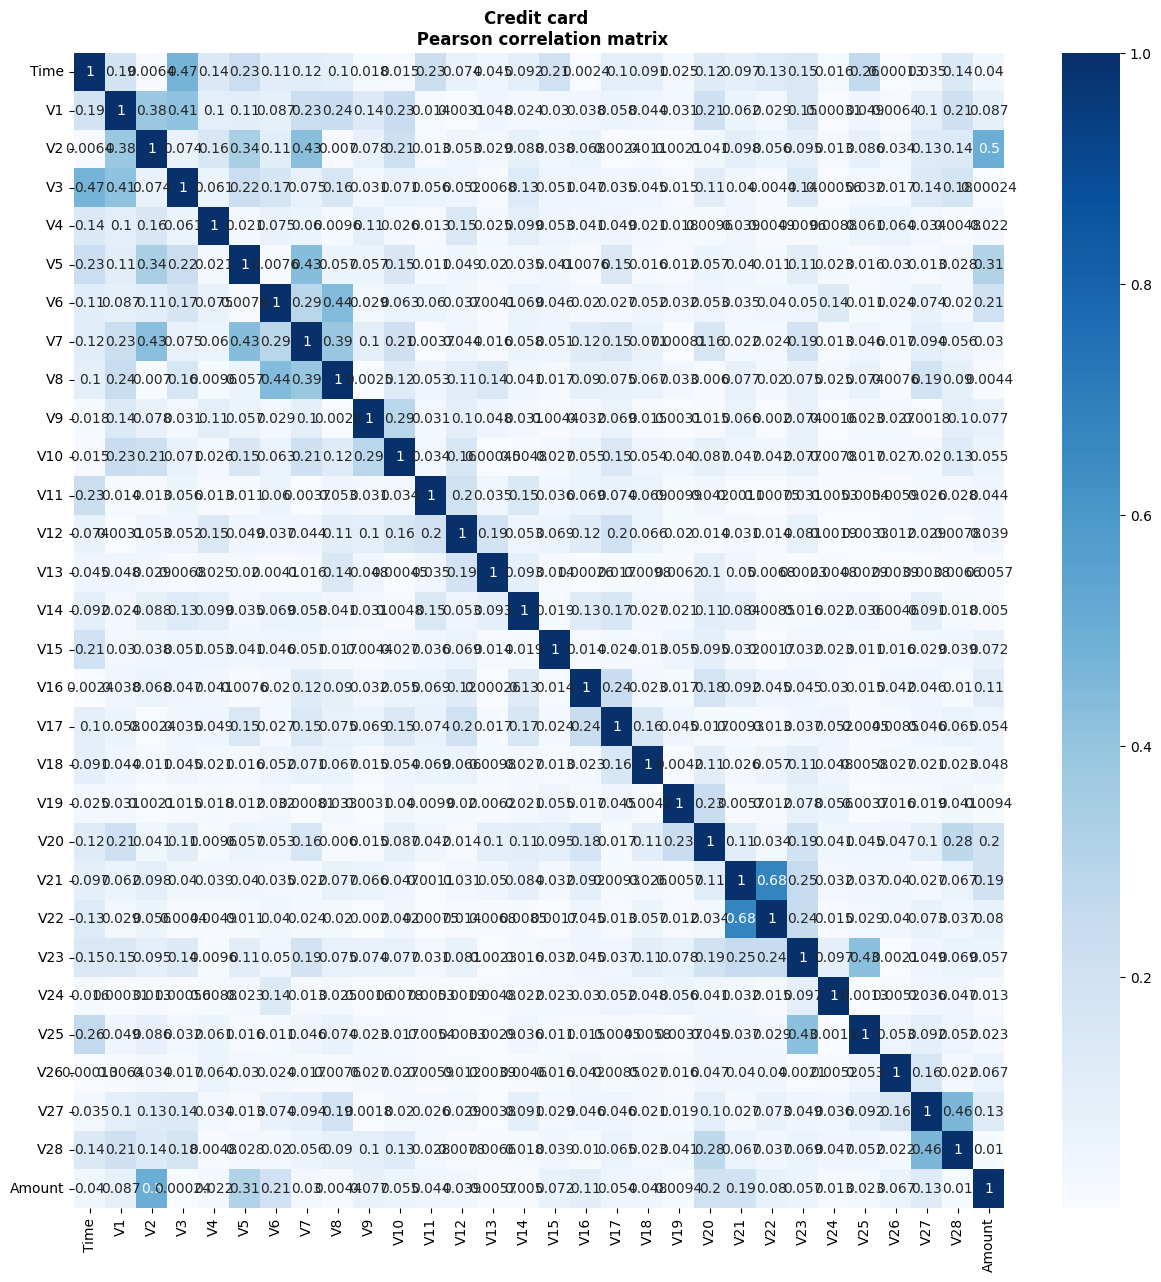

In [10]:
attribute_dataset = dataset.iloc[:, 0:30]
attributes_name = dataset.columns[0:30]

correlation_attributes_pearson = []

correlation_matrix = attribute_dataset.corr(method='spearman') 
correlation_matrix = abs(correlation_matrix) 

fig=plt.figure(figsize=(15,15))
ax = plt.axes()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", ax=ax)
ax.set_title('Credit card \n Pearson correlation matrix', weight='bold')
plt.show()

Come si può vedere dalla matrice di correlazione i valori non sono mai vicini a 1, tranne ovviamente sulla diagonale.

Cerchiamo se effettivamente c'è qualche attributo da togliere, usando come soglia 0.75, che comunque è già molto bassa.

In [11]:
treeshold_correlation = 0.75
for i in range(len(correlation_matrix.columns)):
    for j in range(i): # la matrice è simmetrica
        if correlation_matrix.iloc[i,j] >= treeshold_correlation:
            correlation_attributes_pearson.append((attributes_name[i], attributes_name[j], correlation_matrix.iloc[i,j]))
print(correlation_attributes_pearson)

[]


Il codice stampa una lista vuota quindi è meglio non ridurre ulteriormente le dimensioni del dataset

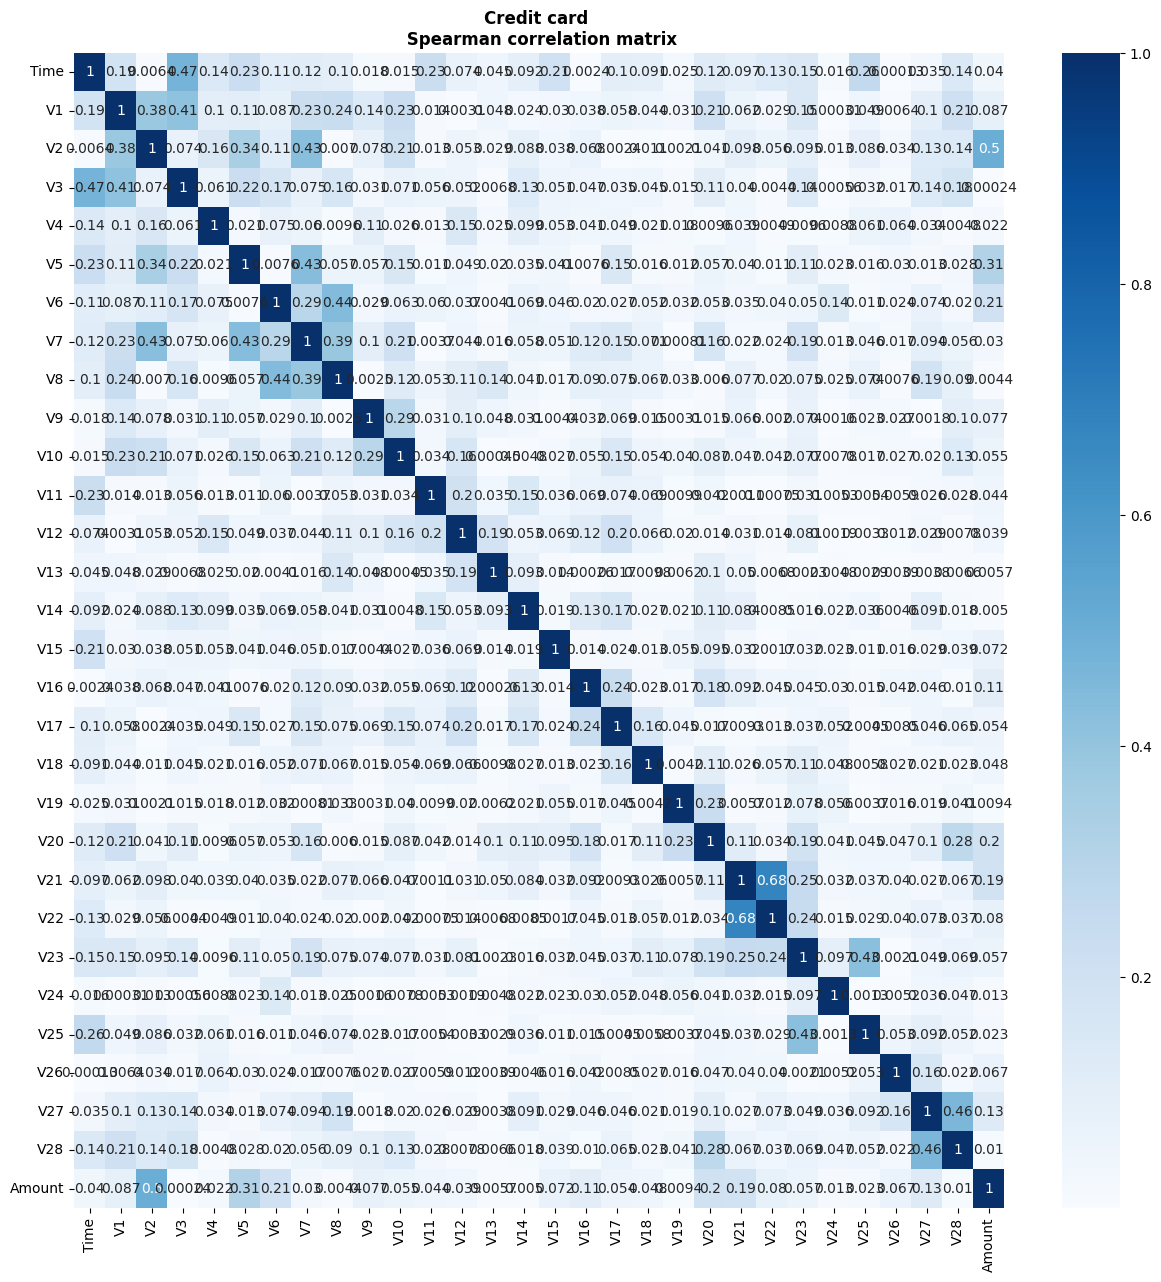

Correlation attributes and spearman index: []


In [12]:
#facciamo un ulteriore test per verificare la presenza o meno di dipendenze quadratiche, il test di spearman
# come prima
correlation_attributes_spearman = []
correlation_matrix = attribute_dataset.corr(method='spearman')
correlation_matrix = abs(correlation_matrix)

fig=plt.figure(figsize=(15,15))
ax = plt.axes()
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", ax=ax)
ax.set_title('Credit card \n Spearman correlation matrix', weight='bold')
plt.show()

for i in range(len(correlation_matrix.columns)):
    for j in range(i): # the matrix is symmetric 
        if correlation_matrix.iloc[i,j] >= treeshold_correlation: #using the same treeshold
            correlation_attributes_spearman.append((attributes_name[i], attributes_name[j], correlation_matrix.iloc[i,j]))
print('Correlation attributes and spearman index:', correlation_attributes_spearman)

Anche il questo caso non troviamo attributi da poter eliminare

utilizziamo dei boxplot per vedere se possiamo ricavare visivamente qualche informazione sugli attributi disponibili

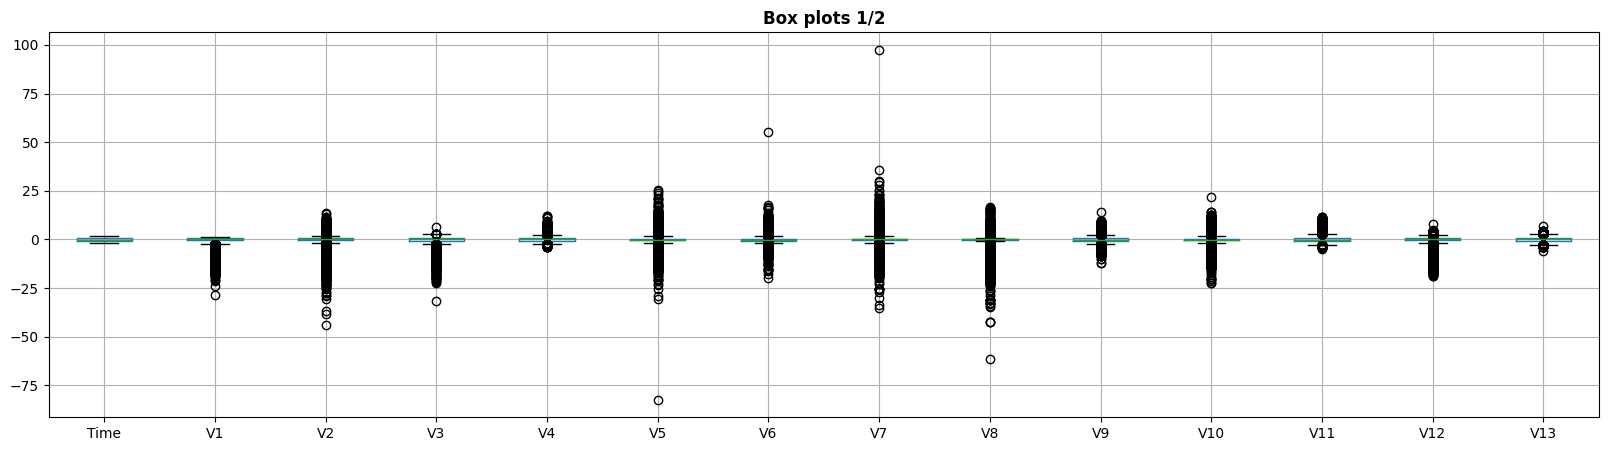

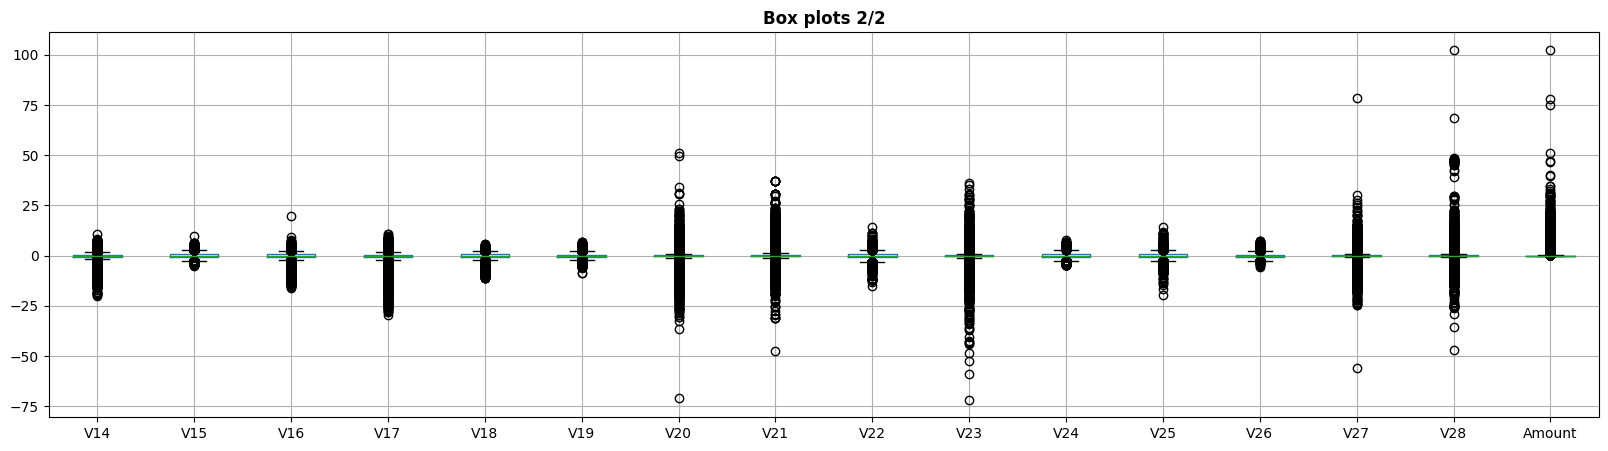

In [20]:
fig=plt.figure(figsize=(20,5))
ax = plt.axes()
dataset.boxplot(column=list(dataset.columns[0:14]))
ax.set_title('Box plots 1/2', weight='bold')
plt.show()

fig=plt.figure(figsize=(20,5))
ax = plt.axes()
dataset.boxplot(column=list(dataset.columns[14:30]))
ax.set_title('Box plots 2/2', weight='bold')
plt.show()

Dai boxplot non ricaviamo molta informazione in quanto ci sono molte osservazioni e si crea un problema di overlapping.

Cerchiamo quindi di plottare le distribuzioni probabilistiche dei vari attributi 

In [44]:
#var = list(dataset.columns.values)

#for i in var:
    #sns.displot(dataset, x=i, kind="kde")

Iniziamo con la costruzione del modello vero e proprio


Iniziamo con una regressione logistica

# Regressione logistica

Iniziamo con la regressione logistica

In [13]:
#inseriamo il parametro 'balanced' in modo da tener conto che le osservazioni con transazioni fraudolente sono molte di meno rispetto a quelle
#oneste
credit_card_logistic_regression = LogisticRegression(random_state=2022, solver='lbfgs', multi_class='auto', class_weight='balanced', penalty='l2')

#divido gli attributi di previsione da quello che voglio prevedere
X = dataset[dataset.columns[0:30]]
Y = dataset['Class']

def logistic_regression(X_train, X_test, Y_train, Y_test, fold_id=None):
    credit_card_logistic_regression.fit(X_train,Y_train)

    Y_pred = credit_card_logistic_regression.predict(X_test)
    confusion_matrix_lg = confusion_matrix(Y_test, Y_pred)

    if fold_id is not None:
        print('\n \n Fold id: ', fold_id)

    #costruisco anche una heatmap per vedere visivamente quanto il mio algoritmo funziona    

    ax = plt.axes()
    sns.heatmap(confusion_matrix_lg, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt='d',cmap="Blues", ax = ax)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    ax.set_title('credit card full classifier\nLogistic Regression - test dataset', weight='bold')
    plt.show()


    #calcolo tutti i parametri per valutare se il mio algoritmo è efficiente o meno
    #comincio con la accuracy
    accuracy_score_lg = accuracy_score(Y_test, Y_pred)
    richiamo=recall_score(Y_test, Y_pred)
    area_sotto_curva=roc_auc_score(Y_test, Y_pred)

    print('Accuracy score:', accuracy_score_lg)
    print('recall:', richiamo)
    print('indice AUC:', area_sotto_curva)
    print('indice f1 ', 2*(richiamo*accuracy_score_lg/(richiamo+accuracy_score_lg)))

Siccome è un dataset parecchio sbilanciato, conviene utilizzare la k-fold cross validation, che consiste nel dividere il dataset
in k-parti (ci saranno quindi k ripetizioni della creazione dell'algoritmo).

A ogni step utilizzo una parte per il test e le rimanenti (k-1) parti per il train
se per ogni step ottengo risultati simili, vuol dire che l'algoritmo è stabile e quindi posso utilizzare l'intero dataset per trainare l'algoritmo.

Tale numero k è un iperparametro, nel senso che devo sceglierlo io; di solito si usa k=5, in quanto in tale modo a ogni step uso il 20% per il test e l'80% per il training come di consueto.


 
 Fold id:  1


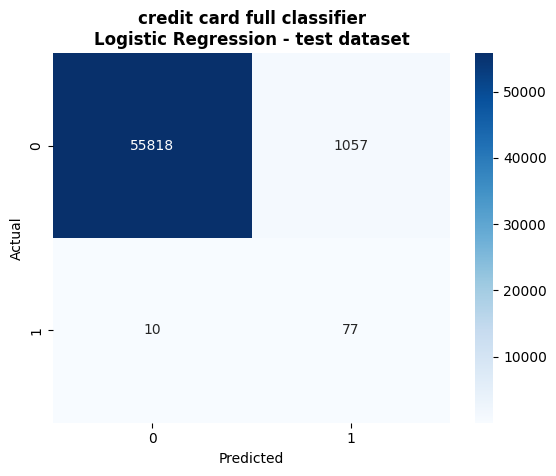

Accuracy score: 0.9812682138969839
recall: 0.8850574712643678
indice AUC: 0.9332364279398762
indice f1  0.930682968068013

 
 Fold id:  2


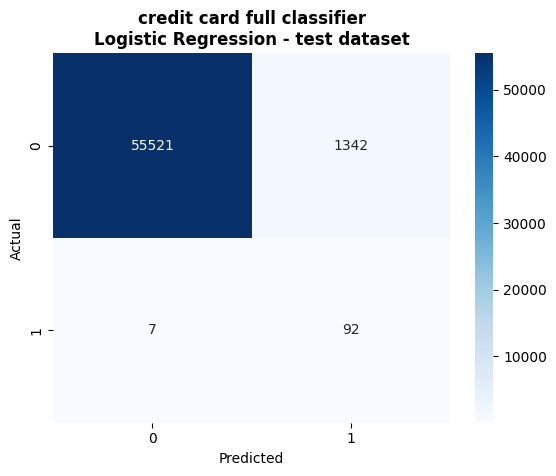

Accuracy score: 0.97631754503002
recall: 0.9292929292929293
indice AUC: 0.9528461727167388
indice f1  0.9522250255927892

 
 Fold id:  3


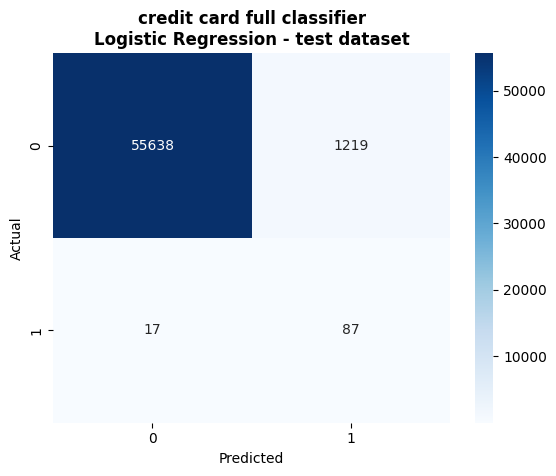

Accuracy score: 0.9783009427503029
recall: 0.8365384615384616
indice AUC: 0.9075493545886374
indice f1  0.9018829584986784

 
 Fold id:  4


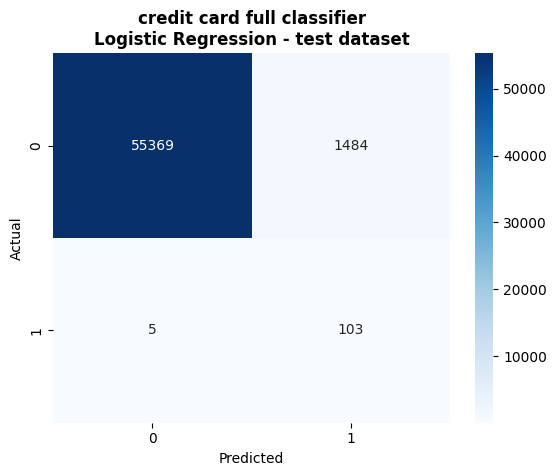

Accuracy score: 0.9738593072453082
recall: 0.9537037037037037
indice AUC: 0.9638006496285743
indice f1  0.9636761267263615

 
 Fold id:  5


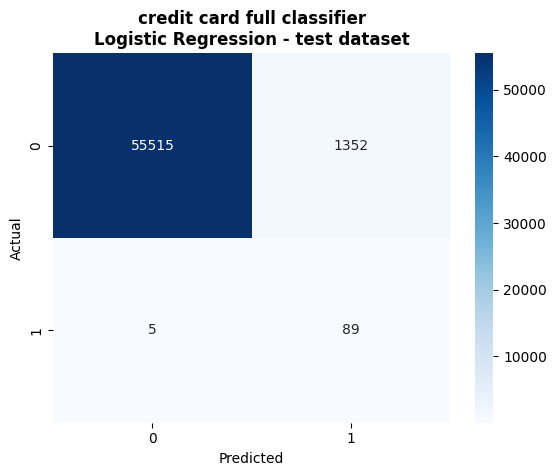

Accuracy score: 0.9761766822913923
recall: 0.9468085106382979
indice AUC: 0.9615168689615073
indice f1  0.9612683384961886


In [14]:
nfolds = 5 # iperparametro
kf = KFold(n_splits=nfolds, shuffle=True, random_state=1)

fold_id = 1
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y[train_index]
    Y_test = Y[test_index]
    logistic_regression(X_train, X_test, Y_train, Y_test, fold_id)
    fold_id += 1

In conclusione un modello creato con la regressione logistica ha degli indici di performance alti e stabili

# Random forest

Proviamo adesso ad utilizzare una random forest, che sulla carta dovrebbe funzionare bene anche quando il dataset è sbilanciato

In [15]:
X = dataset[dataset.columns[0:30]]
Y = dataset['Class']

# divido il dataset in test e train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=2022)

# creo il modello
rf=RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, Y_train)

#faccio la mia predizione
Y_pred=rf.predict(X_test)

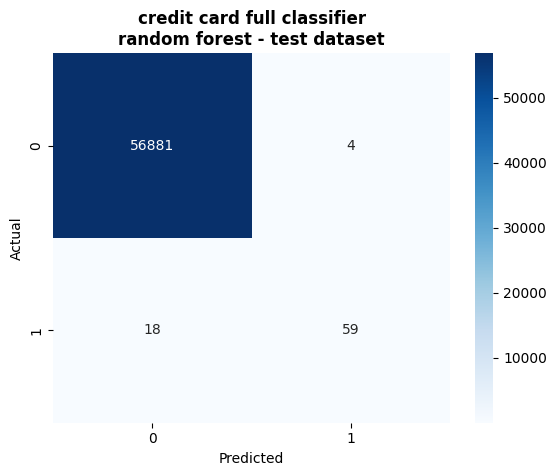

Accuracy score: 0.9996137776061234
recall: 0.7662337662337663
indice AUC: 0.8830817244634596
indice f1  0.8675016507130022


In [16]:
#verifico quanto è efficiente la random forest
confusion_matrix_rf = confusion_matrix(Y_test,Y_pred)

ax = plt.axes()
sns.heatmap(confusion_matrix_rf, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt='d',cmap="Blues", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.set_title('credit card full classifier\nrandom forest - test dataset', weight='bold')
plt.show()


#calcolo tutti i parametri per valutare se il mio algoritmo è efficiente o meno
#comincio con la accuracy
accuracy_score_rf = accuracy_score(Y_test, Y_pred)
richiamo=recall_score(Y_test, Y_pred)
area_sotto_curva=roc_auc_score(Y_test, Y_pred)

print('Accuracy score:', accuracy_score_rf)
print('recall:', richiamo)
print('indice AUC:', area_sotto_curva)
print('indice f1 ', 2*(richiamo*accuracy_score_rf/(richiamo+accuracy_score_rf)))

Rispetto al modello precedente l'accuracy aumenta, ma diminuiscono gli altri indici, in particolare la recall, che è preferibile usare
come principale indice quando abbiamo dei dataset sbilanciati.

Logicamente infatti è meglio avere una percentuale bassa di transazioni fraudolente etichettate come oneste, che il viceversa.

Meglio infatti fermare una transazione onesta e magari fare un check in più chiedendo conferma al cliente, piuttosto che approvare una transazione fraudolenta.

Tenendo conto di questo ragionamento possiamo concludere che la random forest è meno efficiente della regressione logistica.

# K-nn

Proviamo a usare un ultimo algoritmo, che ha in comune con la random forest il fatto che dovrebbe funzionare bene con un dataset sbilanciato


In [17]:
kn = KNeighborsClassifier(n_neighbors=5, weights='distance')
X = dataset[dataset.columns[0:30]]
Y = dataset['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

#train e test
kn.fit(X_train, Y_train)
Y_pred=kn.predict(X_test)


Verifichiamo se il modello funziona bene

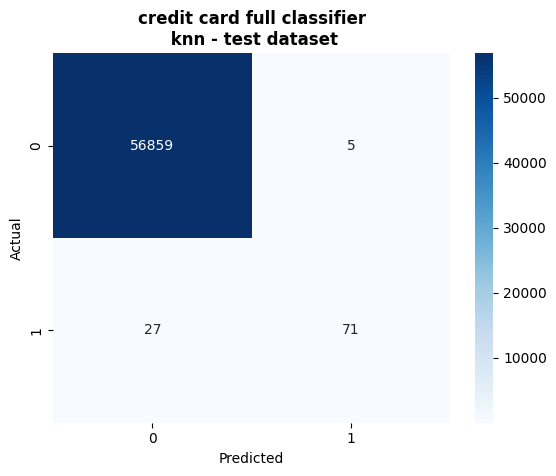

Accuracy score: 0.9994382219725431
recall: 0.7244897959183674
indice AUC: 0.8622009334121944
indice f1  0.8400383147734459


In [18]:
confusion_matrix_kn = confusion_matrix(Y_test,Y_pred)

ax = plt.axes()
sns.heatmap(confusion_matrix_kn, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt='d',cmap="Blues", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.set_title('credit card full classifier\n knn - test dataset', weight='bold')
plt.show()


#calcolo tutti i parametri per valutare se il mio algoritmo è efficiente o meno
accuracy_score_kn = accuracy_score(Y_test, Y_pred)
richiamo=recall_score(Y_test, Y_pred)
area_sotto_curva=roc_auc_score(Y_test, Y_pred)

print('Accuracy score:', accuracy_score_kn)
print('recall:', richiamo)
print('indice AUC:', area_sotto_curva)
print('indice f1 ', 2*(richiamo*accuracy_score_kn/(richiamo+accuracy_score_kn)))

Come si può vedere, anche in questo caso il modello performa peggio rispetto alla regressione logistica

Vediamo se possiamo fare qualcosa per migliorarlo

Un'idea può essere la seguente: l'utilizzo di k=5 è una "rule of thumb" che è anche il valore di default.
Proviamo a vedere se possiamo ottenere un miglioramento nei risultati, cambiando il parametro k.

In [19]:
matrix=[]
vector1=['neighbors', 'recall', 'accuracy', 'indice f1', 'indice AUC']
matrix.append(vector1)
vicini=[]
recall=[]
accuracy=[]
indicef1=[]
indiceAUC=[]
for i in range(1,10):
    kn = KNeighborsClassifier(n_neighbors=i, weights='distance')

    X = dataset[dataset.columns[0:30]]
    Y = dataset['Class']
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

    kn.fit(X_train, Y_train)
    Y_pred=kn.predict(X_test)

    confusion_matrix_kn = confusion_matrix(Y_test,Y_pred)

    accuracy_score_kn = accuracy_score(Y_test, Y_pred)

    accuracy_score_kn = accuracy_score(Y_test, Y_pred)
    richiamo=recall_score(Y_test, Y_pred)
    area_sotto_curva=roc_auc_score(Y_test, Y_pred)
    vettore=[i, richiamo, accuracy_score_kn, 2*(richiamo*accuracy_score_kn/(richiamo+accuracy_score_kn)), area_sotto_curva]
    matrix.append(vettore)


Plottiamo dei grafici per vedere a quanti "vicini" corrisponde il modello migliore

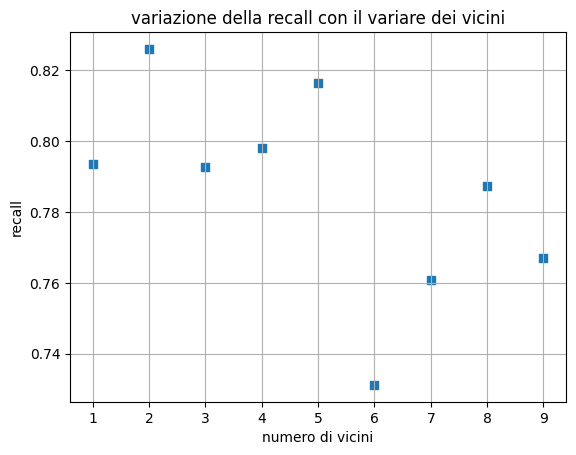

In [20]:
plt.title("variazione della recall con il variare dei vicini")
plt.xlabel("numero di vicini")
plt.ylabel("recall")
plt.grid()

matrix.pop(0)
vicini=[]
recall=[]
for i in matrix:
    vicini.append(i[0])
    recall.append(i[1])
plt.scatter(vicini, recall, marker="s")
plt.show()

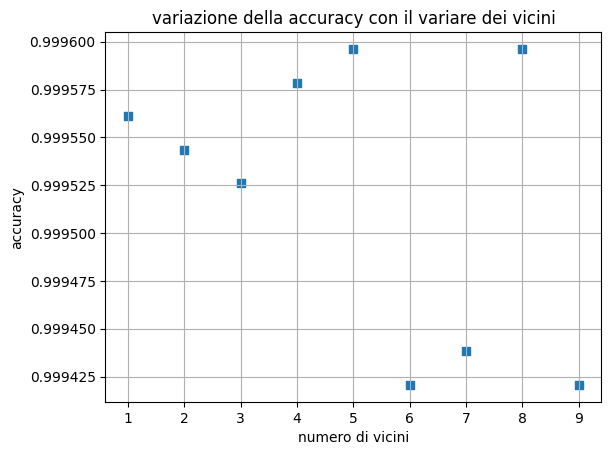

In [21]:
plt.title("variazione della accuracy con il variare dei vicini")
plt.xlabel("numero di vicini")
plt.ylabel("accuracy")
plt.grid()

vicini=[]
accuracy=[]
for i in matrix:
    vicini.append(i[0])
    accuracy.append(i[2])
plt.scatter(vicini, accuracy, marker="s")
plt.show()

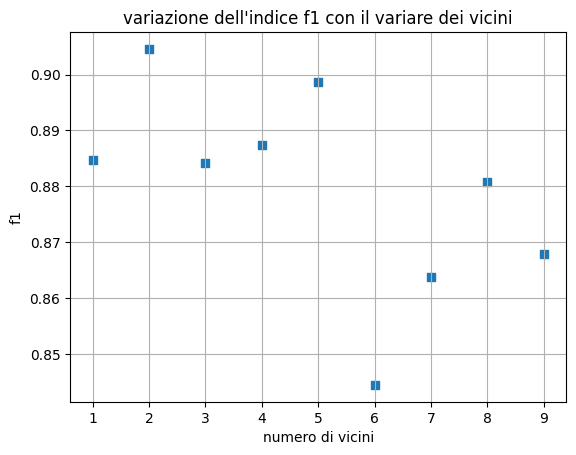

In [22]:
plt.title("variazione dell'indice f1 con il variare dei vicini")
plt.xlabel("numero di vicini")
plt.ylabel("f1")
plt.grid()

vicini=[]
f1=[]
for i in matrix:
    vicini.append(i[0])
    f1.append(i[3])
plt.scatter(vicini, f1, marker="s")
plt.show()

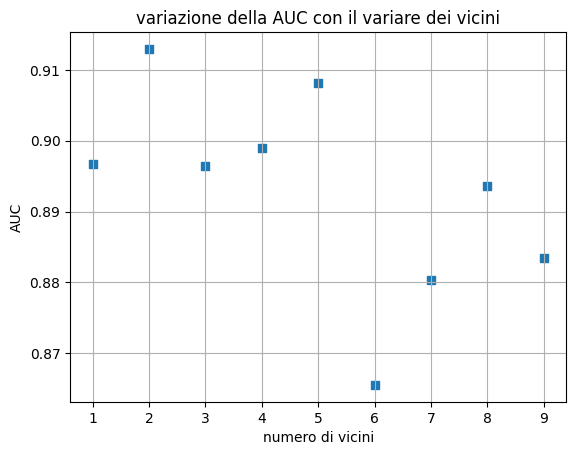

In [23]:
plt.title("variazione della AUC con il variare dei vicini")
plt.xlabel("numero di vicini")
plt.ylabel("AUC")
plt.grid()

vicini=[]
auc=[]
for i in matrix:
    vicini.append(i[0])
    auc.append(i[4])
plt.scatter(vicini, auc, marker="s")
plt.show()

Guardando i grafici e ripetendo la creazione del modello diverse volte si vede come effettivamente k=5 ha in genere gli indici migliori.

# Osservazioni
Ripetendo il campionamento più volte si capisce come il modello migliore finore è la regressione logistica.

Gli indici di tale modello sono già abbastanza alti, ma vediamo se possiamo aumentarli in modo da rendere l'algoritmo più efficiente

# Sbilanciamento del dataset
Per gestire dei dataset sbilanciati abbiamo introdotto dei pesi e delle penalizzazioni, ma a volte potrebbe non bastare.

Un'altra tecnica per gestire dataset di questo tipo è il sovracampionamento della classe in minoranza o il sottocampionamento della classe in maggioranza.

Scegliamo di utilizzare la seconda in che ha il vantaggio di non creare dati fittizzi

In [17]:
#cominciamo con il campionare randomicamente le transazioni oneste
#sottocampioniamole in modo da aumentare il rapporto tra le frodi e il totale delle transazioni
#scelgo il nuovo rapporto
rapporto = 10
n_transazioni_oneste = (rapporto-1) * 492
n_transazioni_oneste

#adesso campiono il dataset iniziale in modo da estrarre solo questo numero di transazioni oneste
oneste = dataset[dataset["Class"]==0].sample(n=n_transazioni_oneste,random_state=16) #random state per la replicabilità
frodi = dataset[dataset["Class"]==1]

dataset_bilanciato=pd.merge(oneste, frodi, how='outer')
dataset_bilanciato                  



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.044302,-0.162316,0.392606,1.071628,0.189222,-0.172257,-0.387087,0.550506,-0.066471,-0.175741,...,0.362343,0.980771,0.447083,0.649381,-2.093435,-1.654310,0.632952,0.796582,-0.053373,0
1,-0.724790,0.353855,-0.563689,1.076715,1.204027,-0.777973,1.358972,-0.884272,0.589544,1.283036,...,0.169040,0.816797,-0.273818,-0.388990,0.636245,-0.409966,0.279789,0.139261,0.234449,0
2,-0.868636,-0.842126,-0.557501,0.816089,-1.080497,-0.701331,0.371852,-0.398387,0.805056,-0.852626,...,0.868216,1.767822,0.375927,-0.480097,-0.056984,-0.289875,0.518457,0.071708,0.382418,0
3,1.018554,-0.926797,1.160094,-2.226624,0.083928,1.891940,-0.911026,-1.052511,-5.320168,0.121027,...,2.632458,1.099125,-0.722673,-0.908798,-2.371716,-0.818910,2.496337,0.690613,-0.349231,0
4,-0.792891,-0.412264,0.777439,0.785250,0.890066,-0.131661,0.180855,0.181766,0.537450,-0.726728,...,0.109088,0.608803,-0.116263,0.403537,-0.207802,-0.522873,0.745579,0.409729,-0.282143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,1.565196,-0.984271,0.681674,-2.979933,1.235493,-1.134935,-1.509076,-0.713650,0.583757,-1.879564,...,1.059986,-0.439836,1.023956,-0.486893,1.031126,1.634907,0.725116,0.448275,1.206024,1
4916,1.569513,0.703816,0.780825,-3.300405,0.997163,0.320654,-0.995697,-1.142333,0.208084,-1.026183,...,0.504561,0.038906,-0.233226,-0.133823,1.001146,1.533445,0.964126,0.565424,-0.350191,1
4917,1.569597,-0.345201,0.682106,-1.459981,0.330758,-0.811843,-0.002512,-1.806446,1.013235,-0.593694,...,1.023557,1.149383,0.305775,0.052952,-1.419005,0.976950,0.954106,0.588827,-0.041818,1
4918,1.582548,-1.589750,0.354788,-3.561235,1.283379,-0.609036,-2.209425,-1.784833,0.886450,-1.485790,...,0.794088,-0.370964,-0.730404,-0.303245,-0.629546,1.256912,2.192284,-0.768596,0.626302,1


# Dataset bilanciato
Le frodi non sono più lo 0.2% del totale, ma sono il 10%
Proviamo ora a ricreare il modello di regressione logistica su questo dataset e vediamo se il modello aumenta le sue performance.

In [24]:
balanced_logistic_regression = LogisticRegression(random_state=2022, solver='lbfgs', multi_class='auto', class_weight='balanced', penalty='l2')

#divido gli attributi di previsione da quello che voglio prevedere
X = dataset_bilanciato[dataset_bilanciato.columns[0:30]]
Y = dataset_bilanciato['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=2022)


def logistic_regression(X_train, X_test, Y_train, Y_test, fold_id=None):
    balanced_logistic_regression.fit(X_train,Y_train)

    Y_pred = balanced_logistic_regression.predict(X_test)
    confusion_matrix_lg = confusion_matrix(Y_test, Y_pred)

    if fold_id is not None:
        print('\n \n Fold id: ', fold_id)

    #costruisco anche una heatmap per vedere visivamente quanto il mio algoritmo funziona    

    ax = plt.axes()
    sns.heatmap(confusion_matrix_lg, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt='d',cmap="Blues", ax = ax)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    ax.set_title('credit card full classifier\n balanced logistic Regression - test dataset', weight='bold')
    plt.show()

    #aggiungiamo questa parte di codice che stampa i coefficienti della regressione logistica, che ordina gli attributi dal più importante
    #al meno importante, ci servirà dopo per il campionamento controllato
    coefficienti = np.exp(balanced_logistic_regression.coef_[0]) #prendo l'esponenziale dei coefficienti, perchè questi sono calcolati su base
    tab_coeff=pd.DataFrame(coefficienti, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)
    print(tab_coeff)
    
     #calcolo tutti i parametri per valutare se il mio algoritmo è efficiente o meno
    #comincio con la accuracy
    accuracy_score_lg = accuracy_score(Y_test, Y_pred)
    richiamo=recall_score(Y_test, Y_pred)
    area_sotto_curva=roc_auc_score(Y_test, Y_pred)

    print('Accuracy score:', accuracy_score_lg)
    print('recall:', richiamo)
    print('indice AUC:', area_sotto_curva)
    print('indice f1 ', 2*(richiamo*accuracy_score_lg/(richiamo+accuracy_score_lg)))

Vediamo dunque se funziona meglio l'algoritmo, anche in questo caso facendo un ulteriore check con la k-fold cross validation.


 
 Fold id:  1


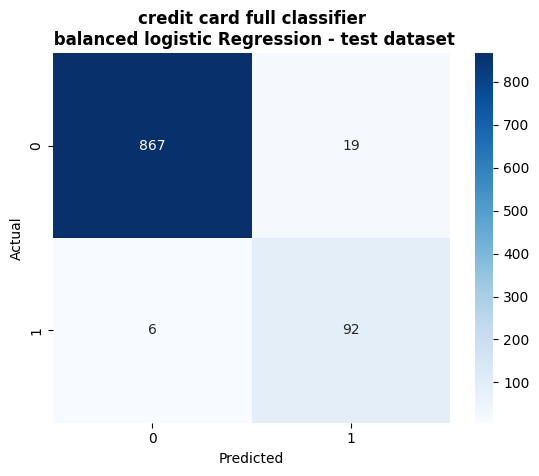

            coef
Amount  5.457604
V4      2.869794
V1      2.861296
V5      2.426243
V2      1.979215
V22     1.598470
V11     1.566975
V27     1.347483
V19     1.346224
V23     1.235422
V28     1.224792
V3      1.195744
V21     1.136088
V25     0.985030
V24     0.928602
V26     0.908450
V15     0.905701
V9      0.814428
V18     0.741368
V13     0.691903
V16     0.618793
Time    0.611270
V7      0.610408
V20     0.602535
V8      0.595053
V6      0.573031
V17     0.530449
V10     0.465285
V12     0.384416
V14     0.296170
Accuracy score: 0.9745934959349594
recall: 0.9387755102040817
indice AUC: 0.958665407472244
indice f1  0.9563492493631781

 
 Fold id:  2


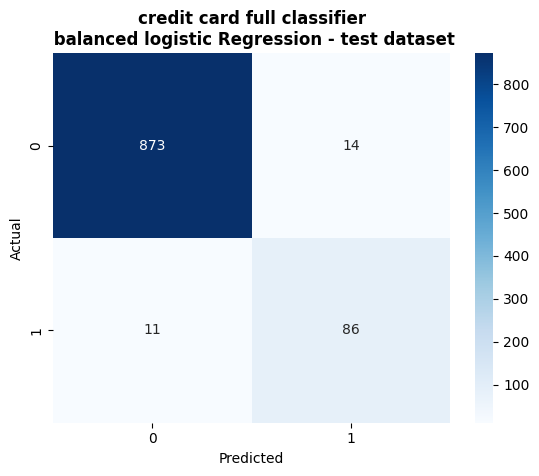

            coef
Amount  3.413989
V4      3.382443
V1      2.383726
V5      1.888462
V2      1.698977
V27     1.571577
V11     1.560838
V22     1.343389
V3      1.260390
V28     1.245521
V21     1.095240
V24     1.093739
V23     1.024180
V15     0.983861
V25     0.948355
V19     0.941772
V18     0.897368
V26     0.870421
V7      0.820456
V9      0.798011
V20     0.739396
Time    0.718847
V6      0.658807
V13     0.620050
V17     0.535869
V8      0.527166
V10     0.497077
V16     0.475719
V12     0.429930
V14     0.300773
Accuracy score: 0.9745934959349594
recall: 0.8865979381443299
indice AUC: 0.9354071990608911
indice f1  0.928515539243556

 
 Fold id:  3


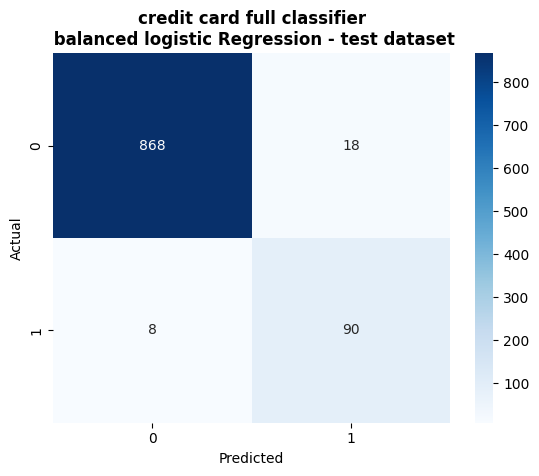

            coef
Amount  6.043252
V1      3.776826
V4      3.291574
V5      2.200336
V2      1.740344
V22     1.667252
V3      1.455688
V11     1.403110
V28     1.285290
V19     1.274757
V21     1.224487
V23     1.146594
V25     1.019278
V24     0.962753
V27     0.906543
V18     0.847384
V15     0.842876
V26     0.751294
Time    0.705063
V13     0.642505
V8      0.582899
V6      0.581209
V16     0.574876
V17     0.559238
V9      0.492721
V20     0.492656
V7      0.473327
V12     0.350960
V14     0.318179
V10     0.315298
Accuracy score: 0.9735772357723578
recall: 0.9183673469387755
indice AUC: 0.9490256599253697
indice f1  0.9451667360943633

 
 Fold id:  4


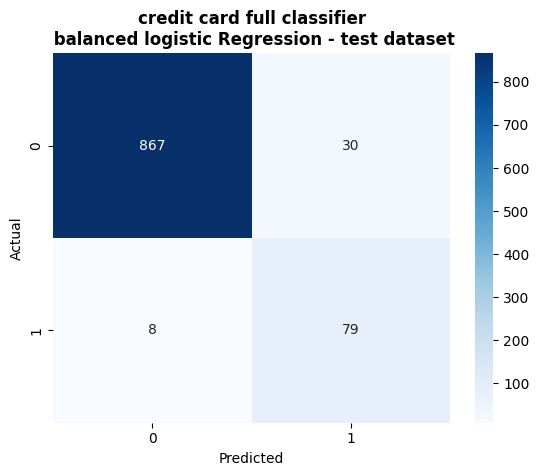

            coef
Amount  3.061767
V4      3.026641
V1      2.128440
V5      1.869513
V11     1.514083
V28     1.504507
V22     1.432940
V2      1.431475
V27     1.283248
V3      1.175181
V24     1.142904
V21     1.099043
V19     1.092816
V23     1.069243
V25     1.011342
V26     0.905236
V7      0.869491
V18     0.850309
V15     0.845455
V13     0.784083
V9      0.765670
Time    0.706967
V20     0.686241
V6      0.660434
V17     0.597607
V16     0.575215
V8      0.569260
V10     0.532553
V12     0.454872
V14     0.294108
Accuracy score: 0.9613821138211383
recall: 0.9080459770114943
indice AUC: 0.9373005804789913
indice f1  0.9339531861182969

 
 Fold id:  5


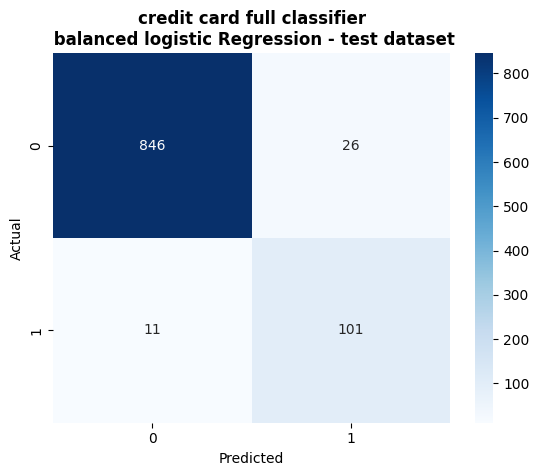

            coef
V4      3.250733
Amount  3.012425
V1      2.748987
V5      2.003611
V22     1.936955
V2      1.543088
V11     1.539610
V27     1.228043
V28     1.196888
V19     1.192640
V3      1.091093
V21     1.069488
V23     1.025311
V26     1.004989
V24     1.001479
V25     0.956716
V15     0.917866
V18     0.817661
V13     0.763828
V20     0.762639
V7      0.753143
V9      0.730272
V16     0.662425
V6      0.592171
V10     0.589975
Time    0.575761
V8      0.526738
V17     0.510092
V12     0.315546
V14     0.242457
Accuracy score: 0.9623983739837398
recall: 0.9017857142857143
indice AUC: 0.9359846002621233
indice f1  0.9311066547252833


In [25]:
nfolds = 5 # iperparametro
kf = KFold(n_splits=nfolds, shuffle=True, random_state=1)

fold_id = 1
for train_index, test_index in kf.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    Y_train = Y[train_index]
    Y_test = Y[test_index]
    logistic_regression(X_train, X_test, Y_train, Y_test, fold_id)
    
    fold_id += 1

Come si può vedere gli indici del modello mediamente aumentano.

Ci sono altri modi però in cui il nostro modello può migliorare:

1-Si potrebbe far variare il rapporto tra frodi e transazioni oneste per trovare il rapporto ottimale

2-Si potrebbe far un campionamento "controllato" piuttosto che uno casuale.


# Sottocampionamento controllato
Proviamo quindi a effettuare un sottocampionamento non casuale.

Il problema di un campionamento random è che il campione che ho preso potrebbe non rispettare la distribuzione probabilistica della "popolazione" che sto campionando e introdurrei quindi dei BIAS.

Ad esempio se fossimo in ambito medico, durante un campionamento random potrei aver campionato solo individui femminili, per lo studio di una malattia in cui il sesso è influente.

Nel caso di queste transazioni noi non conosciamo la natura della maggior parte degli attributi, quindi a maggior ragione non possiamo supporre che siano distribuiti uniformemente.

Come possiamo vedere dai coefficienti del nostro modello, in generale l'attributto più influente risulta essere "amount".

count    2.848070e+05
mean     2.913952e-17
std      1.000002e+00
min     -3.532294e-01
25%     -3.308401e-01
50%     -2.652715e-01
75%     -4.471707e-02
max      1.023622e+02
Name: Amount, dtype: float64

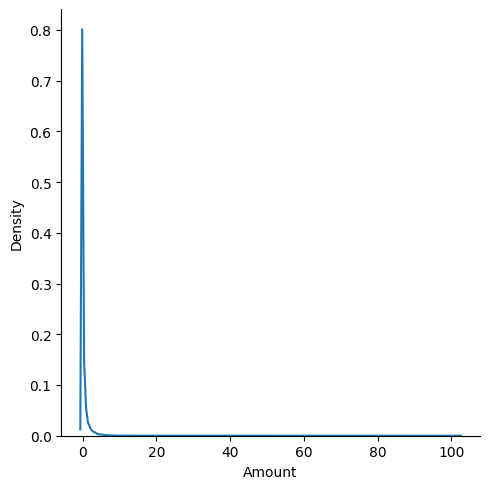

In [13]:
#guardiamo la distribuzione sul dataset iniziale
sns.displot(data=dataset, x="Amount", kind="kde")
dataset["Amount"].describe()


count    4920.000000
mean        0.011202
std         0.930184
min        -0.353229
25%        -0.333639
50%        -0.267370
75%        -0.033422
max        23.375012
Name: Amount, dtype: float64

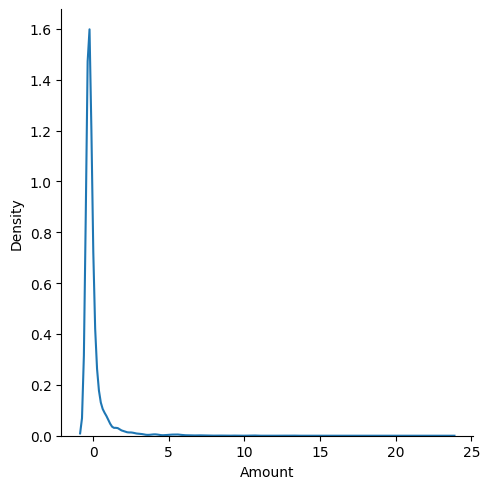

In [18]:
#guardiamo ora la distribuzione nel nostro campionamento random
sns.displot(data=dataset_bilanciato, x="Amount", kind="kde")
dataset_bilanciato["Amount"].describe()

Come si può vedere dai grafici e dalle tabelle, le distribuzioni della variabile Amount nel dataset iniziale e nel dataset campionato sono un po' diverse tra loro.

Per fare un campionamento controllato, seguo i quartili della distribuzione: compongo il dataset delle transazioni oneste, prendendone un quarto
per quartile della distribuzione iniziale.

In [19]:
#calcoliamo il vettore dei quartili
quartili=[]
quartili.append(dataset["Amount"].quantile(q=0.25,  interpolation="linear"))
quartili.append(dataset["Amount"].quantile(q=0.5,  interpolation="linear"))
quartili.append(dataset["Amount"].quantile(q=0.75,  interpolation="linear"))
quartili.append(max(dataset["Amount"]))
quartili


[-0.33084011028077104,
 -0.2652714967001885,
 -0.044717071811601214,
 102.36224270928423]

In [20]:
oneste_1 = dataset[dataset["Amount"]<quartili[0]].sample(n=int(n_transazioni_oneste/4),random_state=16)
oneste_2 = dataset[(dataset["Amount"]>quartili[0])&(dataset["Amount"]<=quartili[1])].sample(n=int(n_transazioni_oneste/4),random_state=16)
oneste_3 =dataset[(dataset["Amount"]>quartili[1])&(dataset["Amount"]<=quartili[2])].sample(n=int(n_transazioni_oneste/4),random_state=16)
oneste_4 = dataset[dataset["Amount"]>quartili[2]].sample(n=int(n_transazioni_oneste/4),random_state=16)

dataset_bilanciato_2=oneste_1.append(oneste_2).append(oneste_3).append(oneste_4).append(frodi)


C:\Users\user\AppData\Local\Temp\ipykernel_22780\1368345444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_bilanciato_2=oneste_1.append(oneste_2).append(oneste_3).append(oneste_4).append(frodi)
C:\Users\user\AppData\Local\Temp\ipykernel_22780\1368345444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_bilanciato_2=oneste_1.append(oneste_2).append(oneste_3).append(oneste_4).append(frodi)
C:\Users\user\AppData\Local\Temp\ipykernel_22780\1368345444.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset_bilanciato_2=oneste_1.append(oneste_2).append(oneste_3).append(oneste_4).append(frodi)
C:\Users\user\AppData\Local\Temp\ipykernel_22780\1368345444.py:8: FutureWarning: The frame.append method is depr

Abbiamo quindi creato un dataset bilanciato, controllando il campionamento, basandoci sui quartili dell'attributo "Amount".


count    4920.000000
mean        0.014730
std         0.878281
min        -0.353229
25%        -0.334398
50%        -0.267750
75%        -0.026436
max        14.234068
Name: Amount, dtype: float64

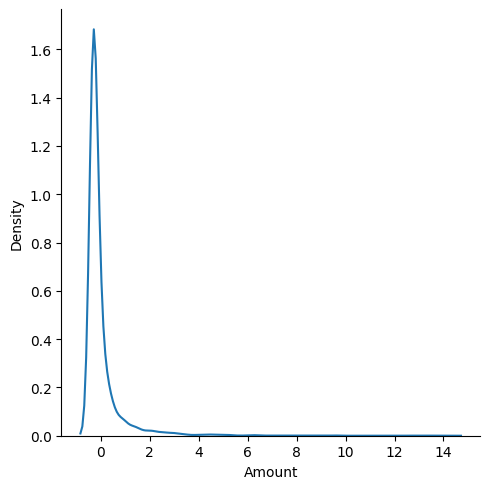

In [21]:
#guardiamo la nuova distribuzione
sns.displot(data=dataset_bilanciato_2, x="Amount", kind="kde")
dataset_bilanciato_2["Amount"].describe()

Proviamo adesso a vedere se il modello creato sul campionamento controllato migliora.

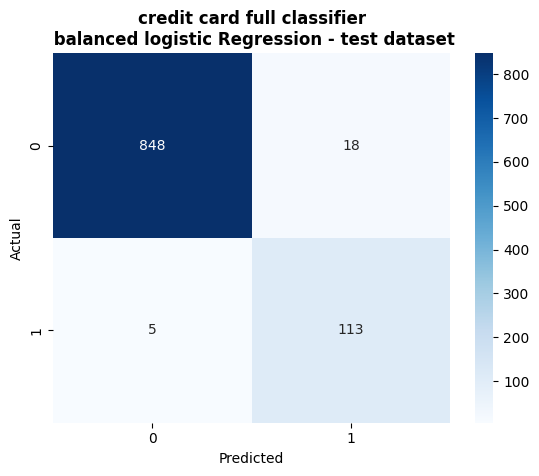

Accuracy score: 0.9766260162601627
recall: 0.9576271186440678
indice AUC: 0.9684209496222649
indice f1  0.9670332606082195


In [23]:
balanced_logistic_regression_2 = LogisticRegression(random_state=2022, solver='lbfgs', multi_class='auto', class_weight='balanced', penalty='l2')

#divido gli attributi di previsione da quello che voglio prevedere
X = dataset_bilanciato_2[dataset_bilanciato_2.columns[0:30]]
Y = dataset_bilanciato_2['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=2022)

balanced_logistic_regression_2.fit(X_train,Y_train)
Y_pred = balanced_logistic_regression_2.predict(X_test)
confusion_matrix_lg = confusion_matrix(Y_test, Y_pred)
#costruisco anche una heatmap per vedere visivamente quanto il mio algoritmo funziona    

ax = plt.axes()
sns.heatmap(confusion_matrix_lg, xticklabels=['0', '1'], yticklabels=['0', '1'], annot=True, fmt='d',cmap="Blues", ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
ax.set_title('credit card full classifier\n balanced logistic Regression - test dataset', weight='bold')
plt.show()

    #calcolo tutti i parametri per valutare se il mio algoritmo è efficiente o meno
    #comincio con la accuracy
accuracy_score_lg = accuracy_score(Y_test, Y_pred)
richiamo=recall_score(Y_test, Y_pred)
area_sotto_curva=roc_auc_score(Y_test, Y_pred)

print('Accuracy score:', accuracy_score_lg)
print('recall:', richiamo)
print('indice AUC:', area_sotto_curva)
print('indice f1 ', 2*(richiamo*accuracy_score_lg/(richiamo+accuracy_score_lg)))

Come si vede, il modello fatto in questo modo aumenta di molto la recall, che arriva ad avere una media di circa il 96%